# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part-1


### Linear Regressor with OLS method

In [79]:
import numpy as np

class MyLRFromOLS:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        """
        Fit the linear regression model using the Ordinary Least Squares method.
        """
        # Calculate the means of X and y
        X_mean = X_train.mean()
        y_mean = y_train.mean()

        num = sum((X_train - X_mean) * (y_train - y_mean))
        div = sum((X_train - X_mean) ** 2)
        # Calculate the slope (m) and intercept (b)
        self.m = num/div
        self.b = y_mean - (self.m * X_mean)


    def predict(self, X_test):
        return self.m * X_test + self.b

    def get_coeff(self):
        print(f"Slope (m): {self.m}")
        print(f"Intercept (b): {self.b}")



In [80]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/tvmarketing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [82]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [83]:
# Separate input and output columns
X = df['TV']
y = df["Sales"]

In [84]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=70)

  ### Prediction time

In [85]:

olslr = MyLRFromOLS()

In [86]:
olslr.fit(X_train,y_train)

In [87]:
#Get values of m and b
olslr.get_coeff()

Slope (m): 0.04657439957443575
Intercept (b): 7.043129503768711


In [88]:
olslr_pred = olslr.predict(X_test)

In [89]:
#View predictions
olslr_pred

115    10.540867
17     20.149166
164    12.501649
197    15.286798
57     13.386563
102    20.093276
99     13.339988
142    17.312785
61     19.213020
109    18.938231
21     18.099892
182     9.660611
11     17.042653
167    16.674715
105    13.465739
147    18.370023
179    14.755850
14     16.548964
97     15.654736
188    20.363408
55     16.306778
125    11.104417
44      8.212147
33     19.413290
121     7.918728
42     20.717373
8       7.443669
20     17.214978
46     11.220853
143    11.914812
12      8.151600
43     16.679373
69     17.140459
18     10.266078
58     16.861013
163    14.658044
166     7.876811
93     18.728646
82     10.550182
67     13.530943
Name: TV, dtype: float64

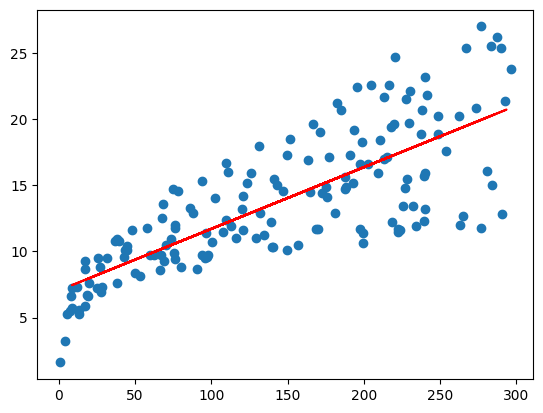

In [90]:
plt.scatter(X_train,y_train)
plt.plot(X_test,olslr_pred,color='red')

### Linear Regressor with gradient descent


In [91]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
    self.m = 0 #assign random value
    self.b  = 0 #assign random value
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
      # calcualte b and m using GD
    for i in range(self.epochs):
      n = len(y_train)
      y_pred = self.m * X_train + self.b

      # Calculate slope wrt b and m
      loss_slope_b =(-2/n) * np.sum(X_train * (y_train - y_pred))
      loss_slope_m = (-2/n) * np.sum(y_train - y_pred)

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)


  def predict(self,X_test):
    return self.m * X_test + self.b

  def get_coeff(self):
    #Write code to get values of m and b
    print(f"Slope (m): {self.m}")
    print(f"Intercept (b): {self.b}")


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [92]:
#Check with different values of learning_rate and epochs for model convergence
learning_rate = 0.000001
epochs = 10000
gdlr = MyLRFromGD(learning_rate, epochs)

In [93]:
gdlr.fit(X_train,y_train)

In [94]:
gdlr_pred = gdlr.predict(X_test)

In [95]:
# Get values of m and b
gdlr.get_coeff()

Slope (m): 0.04309988416934311
Intercept (b): 7.5905080609430575


In [96]:
# View predictions
gdlr_pred

115    10.827309
17     19.718815
164    12.641814
197    15.219188
57     13.460712
102    19.667096
99     13.417612
142    17.094033
61     18.852508
109    18.598218
21     17.822421
182    10.012722
11     16.844053
167    16.503564
105    13.533982
147    18.072400
179    14.727849
14     16.387194
97     15.559677
188    19.917075
55     16.163075
125    11.348818
44      8.672315
33     19.037837
121     8.400786
42     20.244634
8       7.961167
20     17.003523
46     11.456568
143    12.098756
12      8.616285
43     16.507874
69     16.934563
18     10.573020
58     16.675964
163    14.637339
166     8.361996
93     18.404269
82     10.835929
67     13.594322
Name: TV, dtype: float64

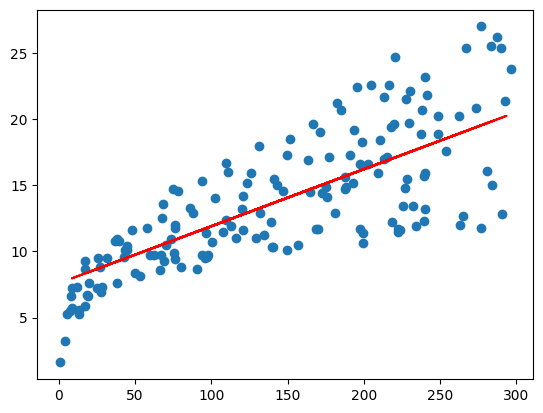

In [97]:
plt.scatter(X_train,y_train)
plt.plot(X_test,gdlr_pred,color='red')

In [98]:
#Compare values of m and b obtained from both method

print("OLS:")
olslr.get_coeff()

print("Gradient Descent:")
gdlr.get_coeff()


OLS:
Slope (m): 0.04657439957443575
Intercept (b): 7.043129503768711
Gradient Descent:
Slope (m): 0.04309988416934311
Intercept (b): 7.5905080609430575


# Part-2

### R2 Score
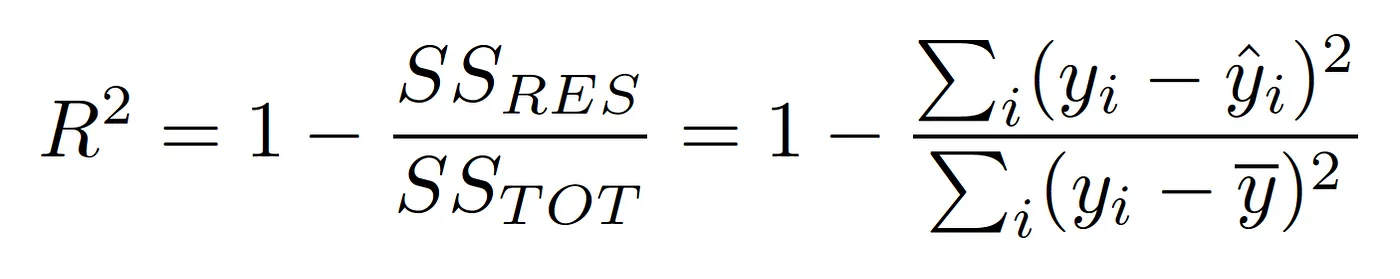

### MEAN ABSOLUTE ERROR
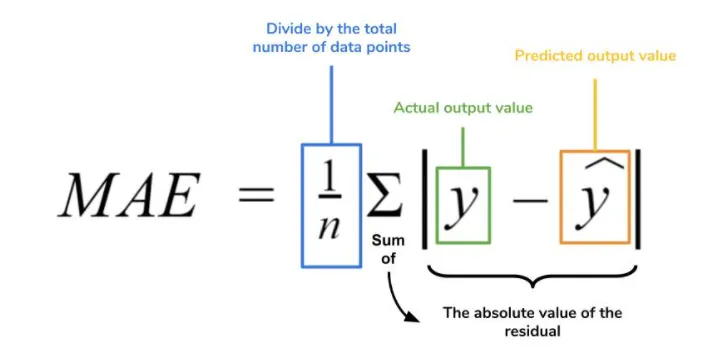

### ROOT MEAN SQUARED ERROR
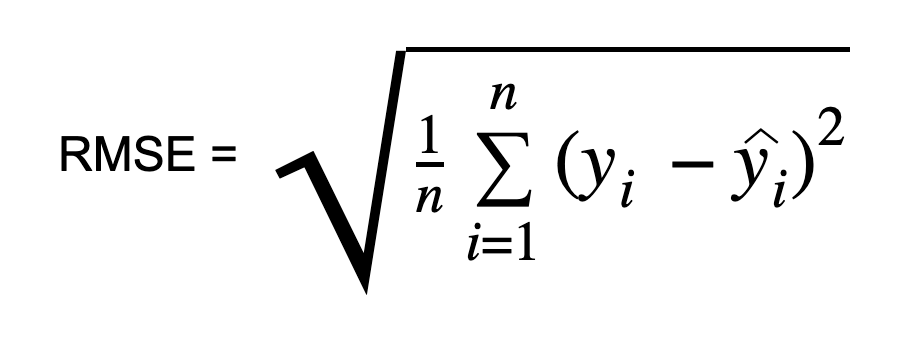

### Evaluation time
Let's see how does both of our models perform.

In [99]:
# Implement R2 Score, MAE and RMSE

class evaluate:

  def __init__(self,y_pred,y_test):
    self.y_pred = y_pred
    self.y_test = y_test

  def r2score(self):
    #Write code here
    r2_score = 0
    n = len(self.y_test)
    y_mean = np.mean(self.y_test)
    ss_tot = np.sum((self.y_test - y_mean)**2)
    ss_res = np.sum((self.y_test - self.y_pred)**2)
    r2_score = 1 - (ss_res/ss_tot)
    return r2_score


  def mae(self):
    #Write code here
    mae = 0
    mae = np.mean(np.abs(self.y_test - self.y_pred))
    return mae


  def rmse(self):
    #write code here
    rmse = 0
    rmse = np.sqrt(np.mean((self.y_test - self.y_pred)**2))
    return rmse


In [100]:
# First calculate all the metrics for olslr_pred


In [101]:
evaluate(olslr_pred,y_test).r2score()

0.6056414819576649

In [102]:
evaluate(olslr_pred,y_test).mae()

2.5808195934672375

In [103]:
evaluate(olslr_pred,y_test).rmse()

3.3754329360100876

In [104]:
# Now for gdlr_pred

In [105]:
evaluate(gdlr_pred,y_test).r2score()

0.5957705754096894

In [106]:
evaluate(gdlr_pred,y_test).mae()

2.640945718545517

In [107]:
evaluate(gdlr_pred,y_test).rmse()

3.4174158745612697

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!



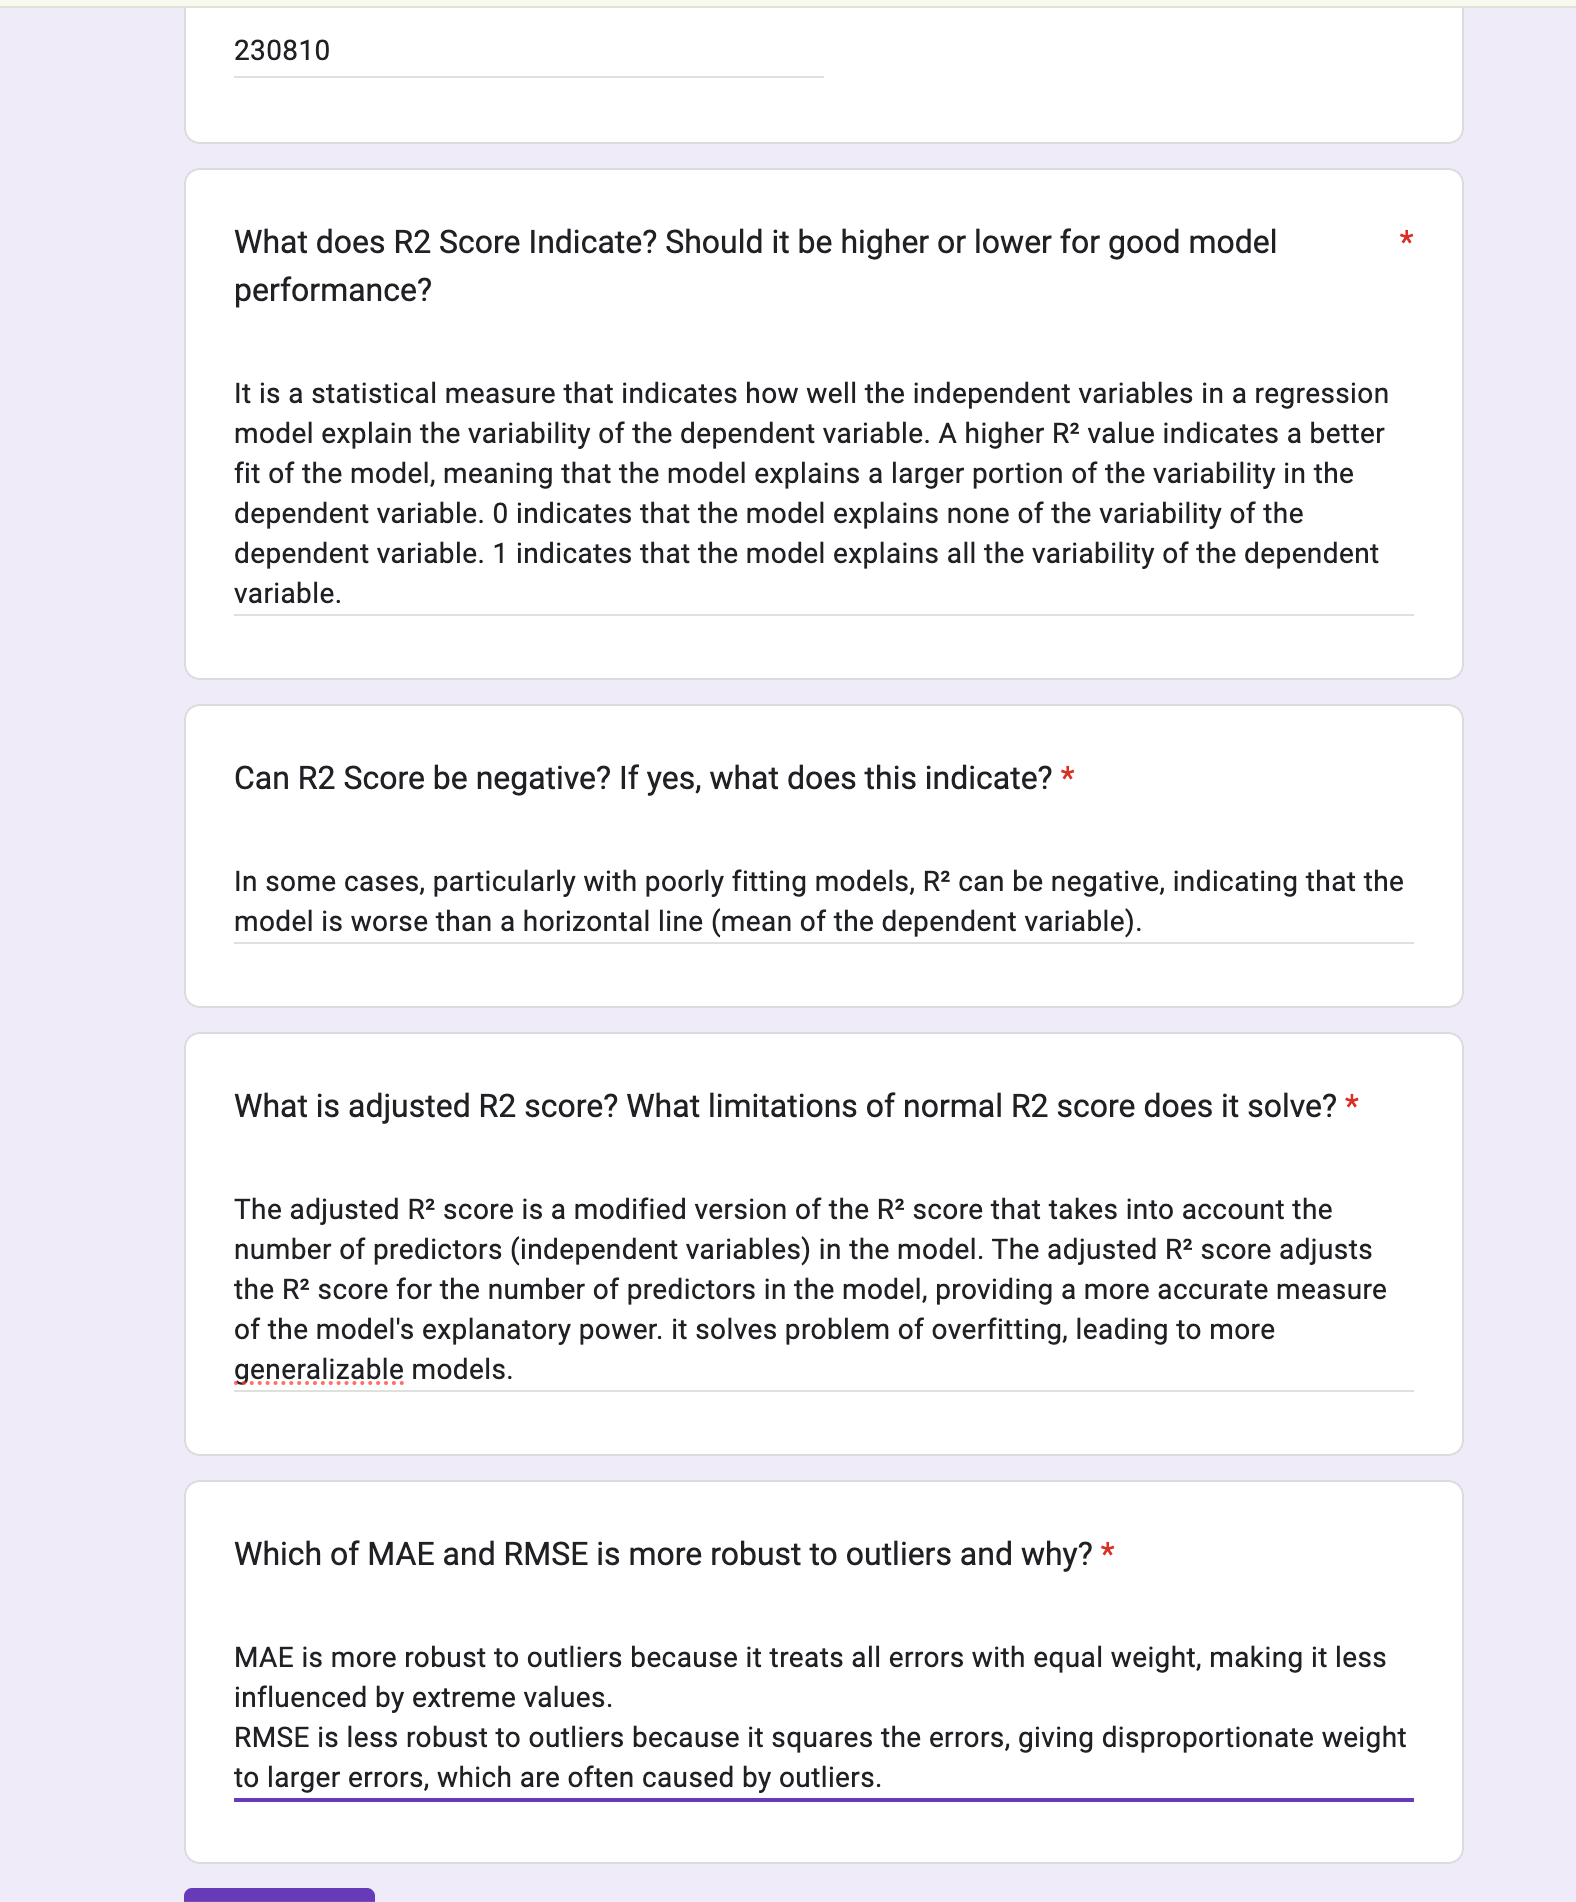